# Setup

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import scvi
import scrnatools as rna
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [3]:
# Setup figure params
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Helvetica"
sc.set_figure_params(dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
plt.rcParams['axes.unicode_minus'] = False
cmap = sns.color_palette("colorblind")

In [4]:
warnings.resetwarnings()

# Import data

In [5]:
rawDataPath = "/mnt/iacchus/joe/raw_data/"
processedDataPath = "/mnt/iacchus/joe/processed_data/"

In [6]:
# rawDataPath = "/mnt/e/Archive/Joe/raw_data/"
# processedDataPath = "/mnt/e/Archive/Joe/processed_data/"

In [7]:
aire = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/pairwise_processing/aire_TECs.h5ad")
fezf2 = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/pairwise_processing/fezf2_TECs.h5ad")

# scVI num genes expressed (Aire)

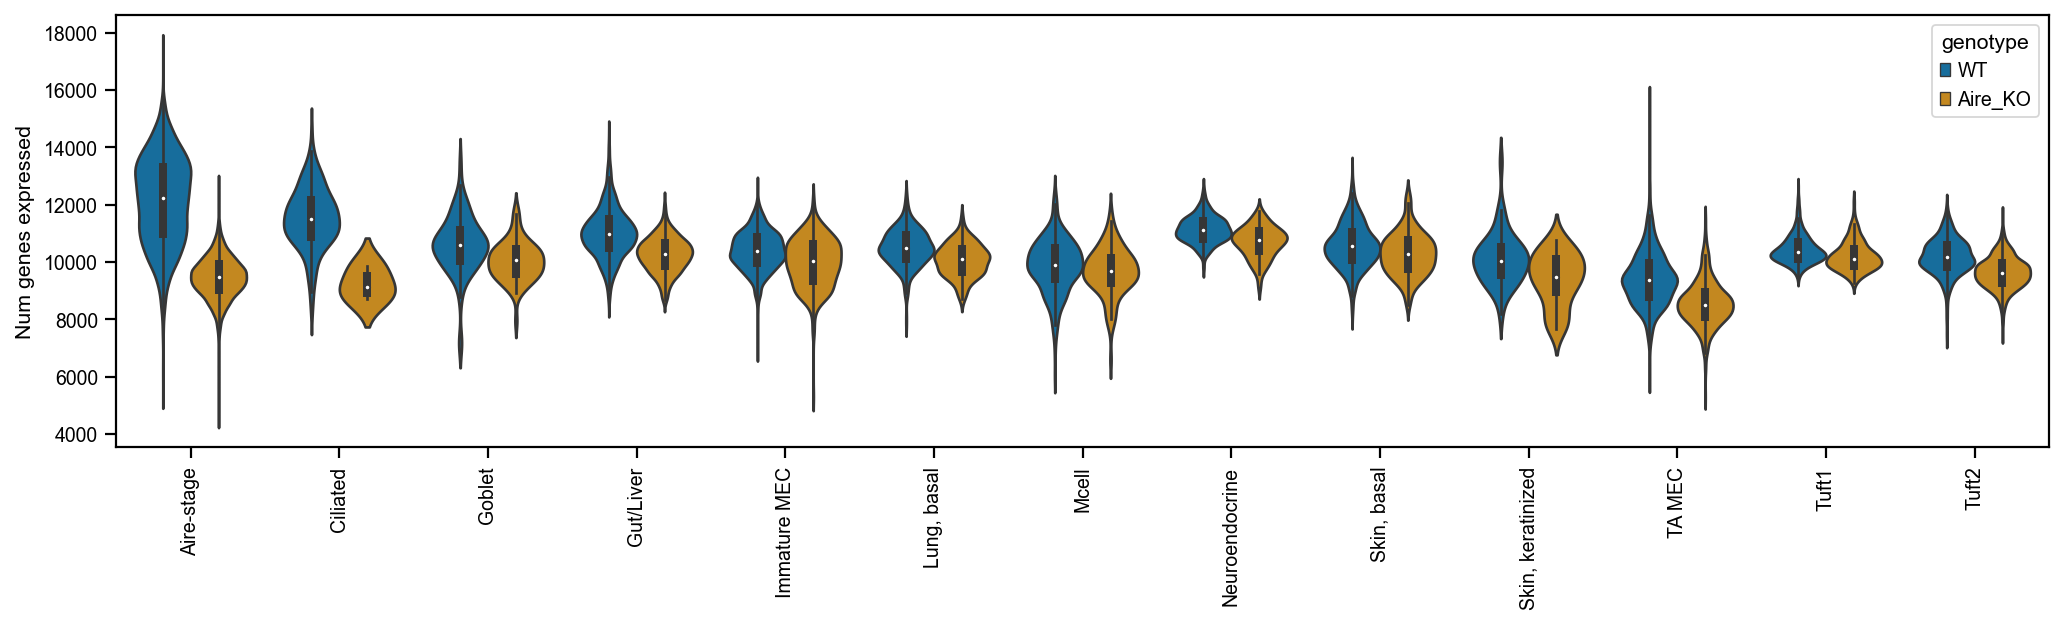

In [8]:
exprs = rna.tl.get_expression_matrix(
    aire, 
    gene_data="scVI_normalized"
)
exprs = exprs > 0.1
exprs = pd.DataFrame(exprs.sum(axis=1))
exprs["cell_type"] = aire.obs.majority_voting
exprs["genotype"] = aire.obs.genotype

plt.figure(figsize=(13,4))
sns.violinplot(
    exprs,
    x="cell_type",
    y=0,
    hue="genotype",
    scale='width',
    width=0.75,
    hue_order=["WT", "Aire_KO"],
    palette=cmap[0:2]
)
plt.xlabel("")
plt.ylabel("Num genes expressed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

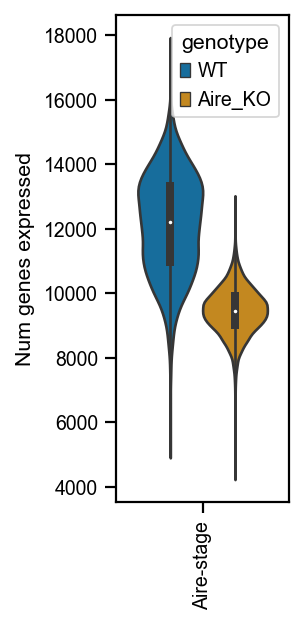

In [9]:
exprs = rna.tl.get_expression_matrix(
    aire[aire.obs.majority_voting == "Aire-stage"], 
    gene_data="scVI_normalized"
)
exprs = exprs > 0.1
exprs = pd.DataFrame(exprs.sum(axis=1))
exprs["cell_type"] = aire.obs.majority_voting
exprs.cell_type = exprs.cell_type.cat.remove_unused_categories()
exprs["genotype"] = aire.obs.genotype

plt.figure(figsize=(2,4))
sns.violinplot(
    exprs,
    x="cell_type",
    y=0,
    hue="genotype",
    scale='width',
    width=0.75,
    hue_order=["WT", "Aire_KO"],
    palette=cmap[0:2]
)
plt.xlabel("")
plt.ylabel("Num genes expressed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../../analysis/paper_figures/S5/S5C_Aire_num_genes_expressed.pdf")
plt.show()

# scVI num genes expressed (Fezf2)

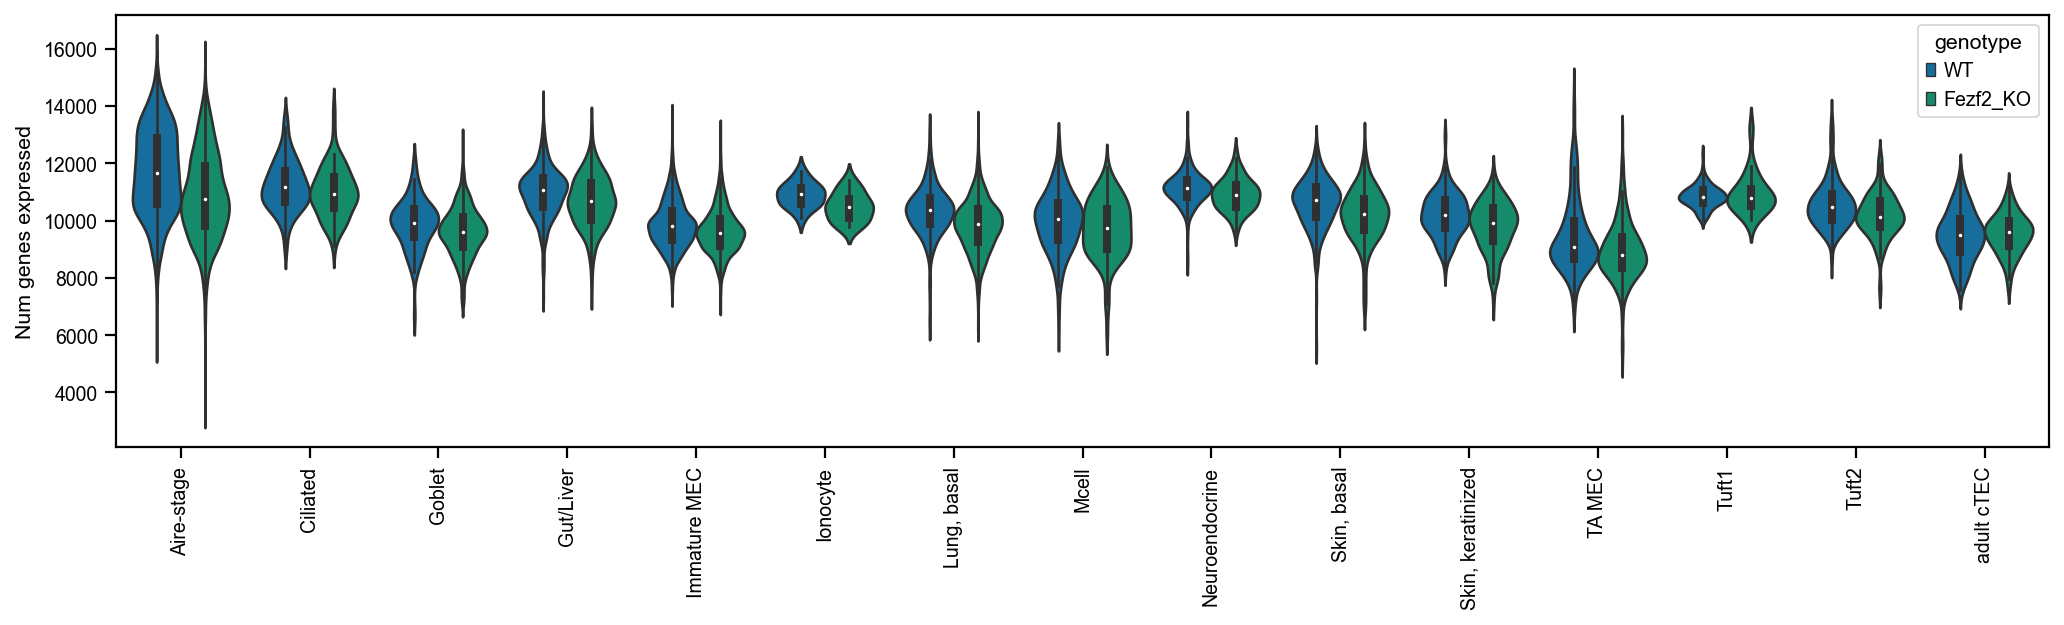

In [10]:
exprs = rna.tl.get_expression_matrix(
    fezf2, 
    gene_data="scVI_normalized"
)
exprs = exprs > 0.1
exprs = pd.DataFrame(exprs.sum(axis=1))
exprs["cell_type"] = fezf2.obs.majority_voting
exprs["genotype"] = fezf2.obs.genotype

plt.figure(figsize=(13,4))
sns.violinplot(
    exprs,
    x="cell_type",
    y=0,
    hue="genotype",
    scale='width',
    width=0.75,
    hue_order=["WT", "Fezf2_KO"],
    palette=[cmap[0], cmap[2]]
)
plt.xlabel("")
plt.ylabel("Num genes expressed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

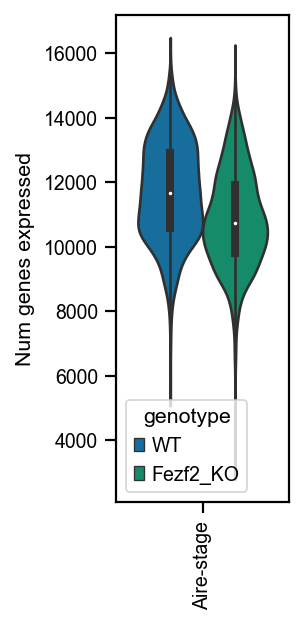

In [11]:
exprs = rna.tl.get_expression_matrix(
    fezf2[fezf2.obs.majority_voting == "Aire-stage"], 
    gene_data="scVI_normalized"
)
exprs = exprs > 0.1
exprs = pd.DataFrame(exprs.sum(axis=1))
exprs["cell_type"] = fezf2.obs.majority_voting
exprs.cell_type = exprs.cell_type.cat.remove_unused_categories()
exprs["genotype"] = fezf2.obs.genotype

plt.figure(figsize=(2,4))
sns.violinplot(
    exprs,
    x="cell_type",
    y=0,
    hue="genotype",
    scale='width',
    width=0.75,
    hue_order=["WT", "Fezf2_KO"],
    palette=[cmap[0], cmap[2]]
)
plt.xlabel("")
plt.ylabel("Num genes expressed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../../analysis/paper_figures/S5/S5C_Fezf2_num_genes_expressed.pdf")
plt.show()